##### **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
list_df = pd.read_csv('/content/listings.csv')
list_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,84,1,25,2020-10-06,0.21,6,234
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,44,2020-12-10,0.43,6,356
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,40,1,58,2021-02-13,0.57,6,154
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,23,2020-10-03,0.18,6,325
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,50,1,17,2020-01-08,0.17,6,356


In [3]:
list_df.shape

(9467, 16)

##### **Geopandas and Geojson**

In [4]:
!pip install geopandas

In [5]:
!pip install geojsonio

##### **TOP AREAS WITH HIGHEST NUMBER OF LISTING**

In [6]:
import geopandas as gpd

neighbourhood_json = gpd.read_file('neighbourhoods.geojson')

neighbourhood_json.head()

,neighbourhood,neighbourhood_group,geometry
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37..."
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,None,"MULTIPOLYGON (((23.73580 38.02347, 23.73345 38..."
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,None,"MULTIPOLYGON (((23.72923 37.98885, 23.72855 37..."
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,None,"MULTIPOLYGON (((23.73376 38.00839, 23.73363 38..."
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,None,"MULTIPOLYGON (((23.71199 37.99614, 23.71249 37..."


In [7]:
neighbourhood_json = neighbourhood_json.sort_values('neighbourhood')

In [8]:
list_df = list_df.sort_values('neighbourhood')

In [9]:
sample_df = list_df.groupby(['neighbourhood']).count()

In [10]:
sample_df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,36,36,36,36,0,36,36,36,36,36,36,31,31,36,36
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,25,25,25,25,0,25,25,25,25,25,25,20,20,25,25
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,580,580,580,580,0,580,580,580,580,580,580,448,448,580,580
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,67,67,67,67,0,67,67,67,67,67,67,51,51,67,67
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,60,60,60,60,0,60,60,60,60,60,60,50,50,60,60


In [11]:
neighbourhood_json['count'] = sample_df['id']
for i in range(44):
  neighbourhood_json['count'][i] = sample_df['id'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


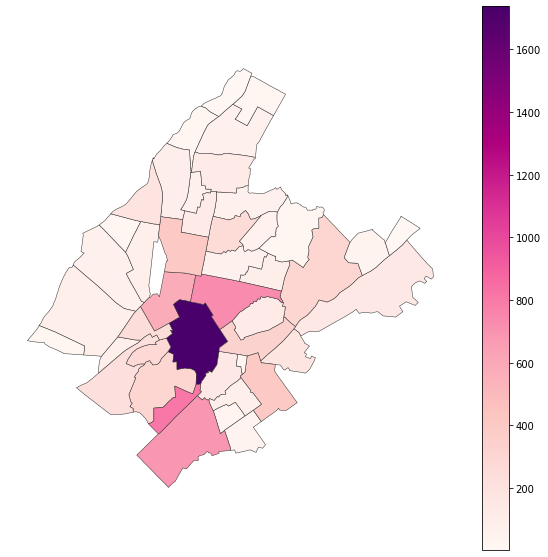

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

fig = neighbourhood_json.plot(column='count', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

In [13]:
neighbourhood_json = neighbourhood_json.sort_values('count', ascending=False)

neighbourhood_json.head(10)

,neighbourhood,neighbourhood_group,geometry,count
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,None,"MULTIPOLYGON (((23.73082 37.98582, 23.73181 37...",1738.0
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,None,"MULTIPOLYGON (((23.73134 37.96807, 23.73071 37...",815.0
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,None,"MULTIPOLYGON (((23.73136 37.99177, 23.73567 37...",729.0
28,ΝΕΟΣ ΚΟΣΜΟΣ,None,"MULTIPOLYGON (((23.73134 37.96658, 23.73155 37...",689.0
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,None,"MULTIPOLYGON (((23.72923 37.98885, 23.72855 37...",580.0
30,ΠΑΓΚΡΑΤΙ,None,"MULTIPOLYGON (((23.74581 37.97592, 23.74644 37...",406.0
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,None,"MULTIPOLYGON (((23.73213 37.99491, 23.73196 37...",404.0
21,ΚΟΛΩΝΑΚΙ,None,"MULTIPOLYGON (((23.75532 37.98111, 23.75495 37...",333.0
5,ΑΚΡΟΠΟΛΗ,None,"MULTIPOLYGON (((23.72432 37.97559, 23.72405 37...",305.0
6,ΑΜΠΕΛΟΚΗΠΟΙ,None,"MULTIPOLYGON (((23.76916 37.99822, 23.76928 37...",302.0


##### **Broken down by ROOM_TYPE**

In [14]:
sample_df = list_df.copy()

In [15]:
sample_df = sample_df.drop(['neighbourhood_group'], axis=1)

In [16]:
merge = neighbourhood_json.set_index('neighbourhood').join(sample_df.set_index('neighbourhood'))

In [17]:
merge.head()

,neighbourhood_group,geometry,count,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...",36.0,18933125.0,Acropolis view loft,28301070.0,Spiros + Electra,37.96152,23.73779,Entire home/apt,28.0,2.0,158.0,2021-01-31,3.51,1.0,298.0
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...",36.0,18555552.0,Diagora apartment,115494661.0,Vasileios,37.96331,23.74172,Entire home/apt,40.0,2.0,30.0,2018-10-31,0.69,1.0,0.0
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...",36.0,10182231.0,Family friedly apartment,50655909.0,Dimitris,37.96372,23.74147,Entire home/apt,80.0,3.0,0.0,NaN,NaN,1.0,365.0
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...",36.0,1272844.0,Small hostel with garden in Mets,2717857.0,Katerina,37.96525,23.73991,Entire home/apt,25.0,3.0,160.0,2021-02-06,1.74,1.0,364.0
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37...",36.0,48105121.0,#AH18 METZ 2-BEDROOM PENTHOUSE APARTMENT,1585338.0,Flavia,37.96430,23.73841,Entire home/apt,126.0,7.0,0.0,NaN,NaN,15.0,349.0


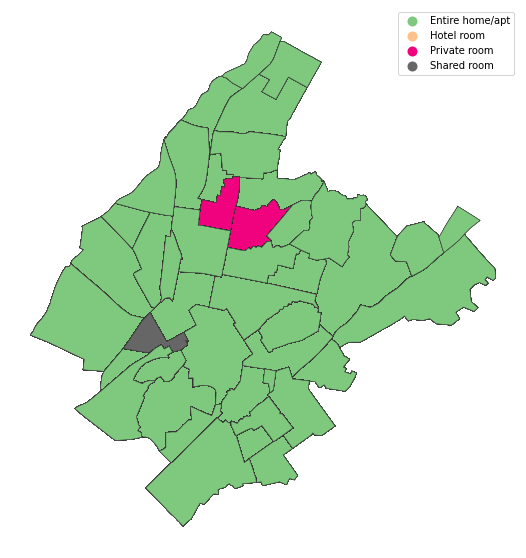

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

fig = merge.plot(column='room_type', cmap='Accent', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

##### **TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS**

In [19]:
sample_df = pd.DataFrame(list_df['host_id'])
sample_df['host_name'] = list_df['host_name']

In [20]:
sample_df = sample_df.drop_duplicates()

In [21]:
sample_df = sample_df.sort_values('host_id')

In [22]:
sample_df.reset_index(inplace = True)
sample_df = sample_df.drop(['index'], axis=1)

In [23]:
sample_df.head()

,host_id,host_name
0,37177,Emmanouil
1,70840,Amanda
2,102433,Pavlos
3,110619,Stathis
4,121318,Francis - Fotios


In [24]:
sample_df.shape

(4955, 2)

In [25]:
sample1_df = list_df.copy()
sample1_df = sample1_df.sort_values('host_name')

In [26]:
sample1_df = list_df.groupby(['host_id']).count()
sample1_df.reset_index(inplace = True)

In [27]:
sample1_df.head()

,host_id,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,37177,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6
1,70840,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
2,102433,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1
3,110619,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2
4,121318,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2


In [28]:
sample1_df.shape

(4955, 16)

In [29]:
sample_df['listing'] = sample1_df['id']
for i in range(4955):
  sample_df['listing'][i] = sample1_df['id'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
sample_df = sample_df.sort_values('listing', ascending=False)

print('TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS')
sample_df.head(10)

TOP 10 HOSTS BY THEIR TOTAL NUMBER OF LISTINGS


,host_id,host_name,listing
1779,77457889,Παναγιώτης,126
902,29927830,Homm ®,113
61,748818,George,67
2212,112527018,Toni,63
2509,135482892,Home+,60
128,2089542,Tia & Mike,56
106,1621474,Mint,56
670,20104194,Upstreet,50
96,1418201,Dean,42
339,7186279,Nick,40
